In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
data = pd.read_excel(r'Churn_Modelling.xlsx')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [8]:
data = data.drop(['RowNumber' , 'CustomerId' , 'Surname'] , axis = 1)

In [9]:
d_types = dict(data.dtypes)

for name , type_ in d_types.items():
    if str(type_) == 'object':
        le = LabelEncoder()
        data[name] = le.fit_transform(data[name])

In [10]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

X = data[remaining_columns].values
Y = data['Exited'].values.astype(np.uint8)

In [11]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

## Model

In [43]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (10,)))  # 10 columns
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [44]:
Opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(Opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [45]:
history = model.fit(X_Train , Y_Train ,validation_data = (X_Test,Y_Test) , epochs = 20 , verbose = 1)

Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 1730.9159 - accuracy: 0.6360 - val_loss: 464.1172 - val_accuracy: 0.7990
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 308.6230 - accuracy: 0.6530 - val_loss: 451.9377 - val_accuracy: 0.8020
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 226.4937 - accuracy: 0.6745 - val_loss: 126.2708 - val_accuracy: 0.8020
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 228.2570 - accuracy: 0.6697 - val_loss: 201.6688 - val_accuracy: 0.8020
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 211.3794 - accuracy: 0.6787 - val_loss: 85.2342 - val_accuracy: 0.4545
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 221.9147 - accuracy: 0.6745 - val_loss: 163.2645 - val_accuracy: 0.8020
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 218.9679 - accuracy: 0.6776 - val_loss: 258.4832 -

## Visualise Performance

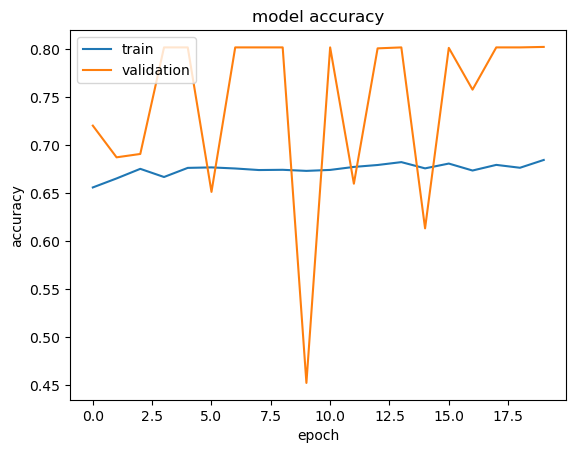

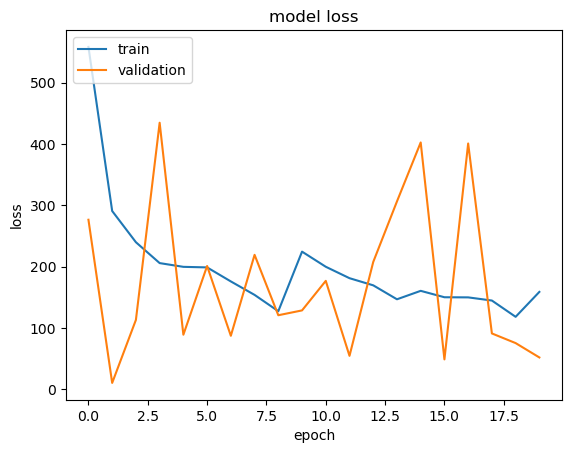

In [16]:
# Accuracy Plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'validation'] , loc = 'upper left')
plt.show()

# Loss Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'validation'] , loc = 'upper left')
plt.show()

#### We can see a lot of pluctuations in a Accuracy Graph which concludes model learning is unstable

## Prediction & Evaluation

In [46]:
pred = np.round(model.predict(X_Test))

In [40]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [47]:
accuracy_score(Y_Test , pred)

0.528

In [48]:
confusion_matrix(Y_Test , pred)

array([[836, 768],
       [176, 220]], dtype=int64)

In [49]:
print(classification_report(Y_Test , pred))

              precision    recall  f1-score   support

           0       0.83      0.52      0.64      1604
           1       0.22      0.56      0.32       396

    accuracy                           0.53      2000
   macro avg       0.52      0.54      0.48      2000
weighted avg       0.71      0.53      0.58      2000



In [21]:
data['Exited'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: Exited, Length: 10000, dtype: float64>

In [23]:
np.unique(Y , return_counts = True)

(array([0, 1], dtype=uint8), array([7963, 2037], dtype=int64))

## Improving Neural Network
* #### Add in class weights to handle imbalance
* #### Increase units in dense layers and also increase number of layers
* #### Add BatchNormalization to Layers
* #### Add dropout after layers

In [26]:
from sklearn.utils.class_weight import compute_class_weight

In [28]:
class_weights = compute_class_weight(class_weight = 'balanced' , classes = np.unique(Y_Train) , y = Y_Train)

In [29]:
class_weights

array([0.62902972, 2.43753809])

In [30]:
model_class_weights = {}

for e , weight in enumerate(class_weights):
    model_class_weights[e] = weight

In [32]:
np.bincount(Y_Train)

array([6359, 1641], dtype=int64)

In [31]:
model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

In [33]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape = (10,)))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128 , activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64 , activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32 , activation = 'relu'))
model.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)               

In [34]:
Opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(Opt , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [35]:
history = model.fit(X_Train , Y_Train ,validation_data = (X_Test,Y_Test),epochs = 20,verbose = 0,class_weight=model_class_weights)

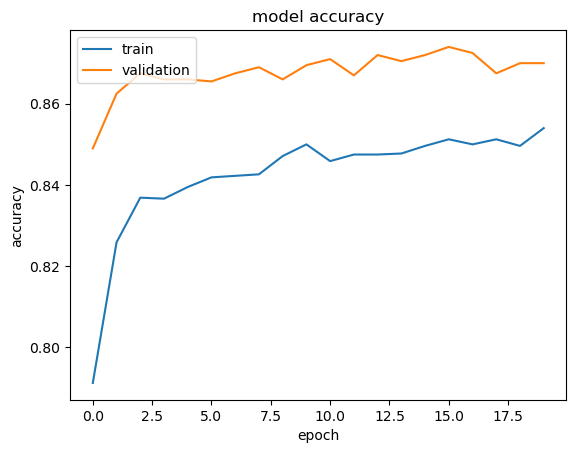

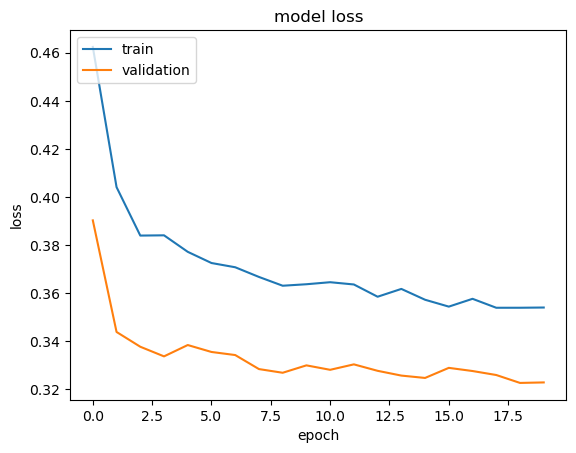

In [36]:
# Accuracy Plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'validation'] , loc = 'upper left')
plt.show()

# Loss Plot

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'validation'] , loc = 'upper left')
plt.show()

In [37]:
pred = np.round(model.predict(X_Test))

In [38]:
accuracy_score(Y_Test , pred)

0.87

In [39]:
confusion_matrix(Y_Test , pred)

array([[1550,   54],
       [ 206,  190]], dtype=int64)

In [42]:
print(classification_report(Y_Test , pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1604
           1       0.78      0.48      0.59       396

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

